In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt

In [6]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

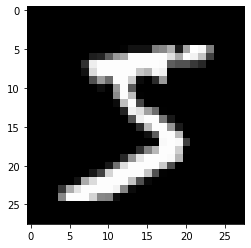

In [7]:
plt.imshow(x_train[0],cmap='gray')
plt.show()

In [8]:
# The values of pixel range b/w 0 and 255 .Normalize it to be between 0 an 1
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())  # converts (28,28,3) to (28*28*3,1)
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))  #10 since num of digits are 10
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2601 - accuracy: 0.9242
Epoch 2/3
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1052 - accuracy: 0.9674
Epoch 3/3
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0706 - accuracy: 0.9779


In [28]:
val_loss,val_acc =  model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0884 - accuracy: 0.9741
0.08841350674629211 0.9740999937057495


7


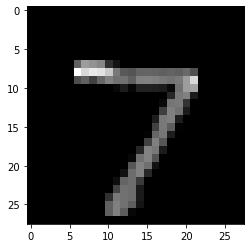

In [10]:
prediction = model.predict(x_test)
print(np.argmax(prediction[0]));
plt.imshow(x_test[0],cmap='gray')
plt.show()

In [11]:
model.save('digit_classifier_v1.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: digit_classifier_v1.model/assets


In [12]:
digit_classifier_model=tf.keras.models.load_model('digit_classifier_v1.model')

7


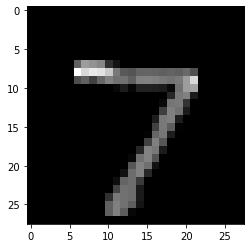

In [14]:
#it will give you the probability distribution for each image which adds up to 1
predictions=digit_classifier_model.predict(x_test)
print(np.argmax(predictions[0]));
plt.imshow(x_test[0],cmap='gray')
plt.show()